Data Visualization on Park Washroom Facilities Dataset.

dataset source : City of Toronto’s Open Data Portal 
link : https://open.toronto.ca/dataset/washroom-facilities/

In [14]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [15]:
#load the dataset

df = pd.read_csv('C:/Users/mid00/Demo_DSI/visualization/02_activities/assignments/Assignment 4/Washroom Facilities - 4326.csv')
df

,_id,id,asset_id,location,alternative_name,type,accessible,hours,location_details,url,address,PostedDate,AssetName,Reason,Comments,Status,geometry
0,1,143,1000000020,David A. Balfour Park,David A. Balfour Park Portable Toilet,Portable Toilet,NaN,NaN,Located on the pathway close to the washroom b...,https://www.toronto.ca/explore-enjoy/parks-rec...,75 Rosehill Ave,2024-11-28T12:03:25,David A. Balfour Park Portable Toilet,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.38..."
1,2,543,29661,Thomson Memorial Park,Thomson Memorial Park South Washroom,Washroom Building,NaN,9 a.m. to 10 p.m.,Located in the south washroom building of the ...,https://www.toronto.ca/explore-enjoy/parks-rec...,1005 Brimley Rd,2024-11-27T07:38:31,Thomson Memorial Park South Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.25..."
2,3,629,1908,Cedarvale Park,Phil White Arena Washroom,Washroom Building,NaN,9 a.m. to 10 p.m.,Entrance is located on the outside of Phil Whi...,https://www.toronto.ca/explore-enjoy/parks-rec...,443 Arlington Ave,2024-11-24T17:17:01,Phil White Arena Washroom,Technical Issues,"Drains clogged , sewage back up.",0,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.43..."
3,4,1429,13061,Power House Recreation Centre,Power House Recreation Centre Washroom,Washroom Building,NaN,View outdoor rink hours,Located in the Community Centre.,https://www.toronto.ca/explore-enjoy/parks-rec...,65 Colonel Samuel Smith Park Dr,2024-11-23T13:19:32,Power House Recreation Centre Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.51..."
4,5,808,28908,West Mall Rink,West Mall Outdoor Rink Washroom,Washroom Building,NaN,View outdoor rink hours,Located in the rink building next to the outdo...,https://www.toronto.ca/explore-enjoy/parks-rec...,370 The West Mall,2024-11-23T13:19:06,West Mall Outdoor Rink Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.56..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,415,2766,2091,Earl Bales Ski and Snowboard Centre,Earl Bales Ski and Snowboard Centre Washroom,Washroom Building,"Accessible Stall, Entrance Access Ramp, Child ...",9 a.m. to 10 p.m.,Entrance is located on the outside of the Ski ...,https://www.toronto.ca/explore-enjoy/parks-rec...,4169 Bathurst St,2023-04-13T14:46:14,Earl Bales Ski and Snowboard Centre Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.43..."
415,416,467,1701,Coronation Park - Toronto,Coronation Park Toronto Washroom,Washroom Building,NaN,9 a.m. to 7:30 p.m.,Located east of the south baseball diamond.,https://www.toronto.ca/explore-enjoy/parks-rec...,711 Lake Shore Blvd W,2023-04-13T14:45:43,Coronation Park Toronto Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.40..."
416,417,335,29312,Budapest Park,Budapest Park Washroom,Washroom Building,NaN,9 a.m. to 10 p.m.,Located at the east end of the parking lot.,https://www.toronto.ca/explore-enjoy/parks-rec...,1575 Lake Shore Blvd W,2023-04-13T14:44:23,Budapest Park Washroom,NaN,NaN,1,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.44..."
417,418,956,6296,Mel Lastman Square,Mel Lastman Square Washroom,Washroom Building,NaN,View centre hours,Located in the Civic Centre.,https://www.toronto.ca/explore-enjoy/parks-rec...,5100 Yonge St,2023-04-13T14:39:44,Mel Lastman Square Washroom,NaN,NaN,0,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.41..."


Clean data

In [16]:
#basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               419 non-null    int64 
 1   id                419 non-null    int64 
 2   asset_id          419 non-null    int64 
 3   location          419 non-null    object
 4   alternative_name  419 non-null    object
 5   type              419 non-null    object
 6   accessible        114 non-null    object
 7   hours             332 non-null    object
 8   location_details  419 non-null    object
 9   url               419 non-null    object
 10  address           418 non-null    object
 11  PostedDate        419 non-null    object
 12  AssetName         419 non-null    object
 13  Reason            133 non-null    object
 14  Comments          29 non-null     object
 15  Status            419 non-null    int64 
 16  geometry          419 non-null    object
dtypes: int64(4), obj

In [17]:
#check for missing values sum

df.isnull().sum()

_id                   0
id                    0
asset_id              0
location              0
alternative_name      0
type                  0
accessible          305
hours                87
location_details      0
url                   0
address               1
PostedDate            0
AssetName             0
Reason              286
Comments            390
Status                0
geometry              0
dtype: int64

After analyzing the dataset, the missing values for the features Accessible, Hours, Address, Reason, and Comments are retained because they reflect the nature of the dataset and do not indicate inconsistencies. These values are recorded only when applicable or available.

In [18]:
#find unique values in washroom types 

df['type'].unique()

array(['Portable Toilet', 'Washroom Building'], dtype=object)

In [19]:
#find unique values in washroom status

df['Status'].unique()

array([1, 0, 2], dtype=int64)

Visualize data

Visualization 1 : Plot the count of washroom types : Portable Toilet Vs Washroom Building 

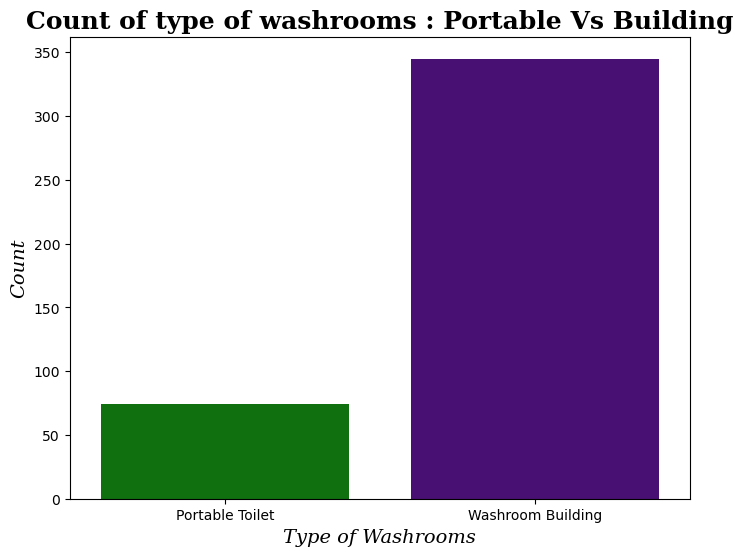

In [36]:
#find the count of washroom types 

plt.figure(figsize=(8, 6))
sns.countplot(x = 'type', data = df, hue = 'type', palette={'Portable Toilet':'green', 'Washroom Building': 'indigo'})
plt.title('Count of type of washrooms : Portable Vs Building', fontsize = 18, fontweight = 'bold', family = 'serif')
plt.xlabel('Type of Washrooms', fontsize=14, fontstyle='italic', family='serif')
plt.ylabel('Count', fontsize=14, fontstyle='italic', family='serif')
plt.show()


Visualization 2 : Subplots for toilet types and their status

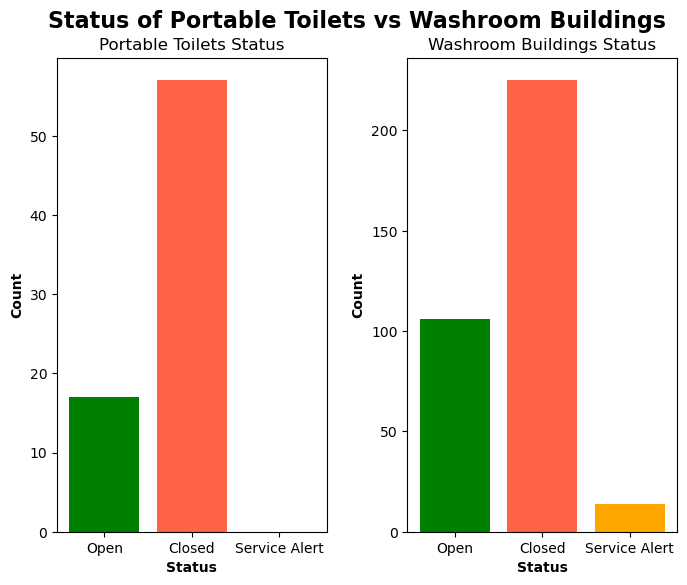

In [65]:
#create subplots for Portable and Building toilets

#filter the dataset to rows where the 'type' is Portable and 'Washroom Building'
portable_toilet_data = df[df['type']== 'Portable Toilet']
building_toilet_data = df[df['type']=='Washroom Building']

#count how many instances of each status exist in Portable type and building type
portable_status_count = portable_toilet_data['Status'].value_counts()
building_status_count = building_toilet_data['Status'].value_counts()


fig,(ax1, ax2) = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(8, 6))

status_labels = {0: 'Open', 1: 'Closed', 2: 'Service Alert'} #label status codes 

# Plot for Portable Toilets
ax1.bar(status_labels.values(), portable_toilet_status, color=['green', 'tomato', 'orange'])
ax1.set_title('Portable Toilets Status')
ax1.set_xlabel('Status', fontweight = 'bold')
ax1.set_ylabel('Count', fontweight = 'bold')

# Plot for Washroom Buildings
ax2.bar(status_labels.values(), building_toilet_status, color=['green', 'tomato', 'orange'])
ax2.set_title('Washroom Buildings Status')
ax2.set_xlabel('Status', fontweight = 'bold')
ax2.set_ylabel('Count', fontweight = 'bold')


# Adding a title for the whole figure
fig.suptitle('Status of Portable Toilets vs Washroom Buildings', fontsize=16, fontweight='bold')

# Adjust spacing between subplots to avoid conjestion
plt.subplots_adjust(wspace = 0.3)

plt.subplots_adjust(top=0.90) #adjust spaceing between the main title and the subplots
plt.show()

